In [34]:
rm tests/fixtures/notebooks.yaml

         date  mapped  validated  cumulative_mapped  cumulative_validated  \
0  2020-04-03      10          0                 10                     0   
1  2020-04-08      38         18                 48                    18   
2  2020-04-09       0         22                 41                    40   
3  2020-04-10       8          0                 49                    40   
4  2020-04-11       3          3                 52                    43   
5  2020-04-12       1          0                 53                    43   
6  2020-04-13       8          3                 61                    46   
7  2020-04-16      16         30                 77                    76   
8  2020-04-23       2          0                 79                    76   

   total_tasks  
0           83  
1           83  
2           83  
3           83  
4           83  
5           83  
6           83  
7           83  
8           83  
Empty DataFrame
Columns: [stats]
Index: []


AttributeError: 'DataFrame' object has no attribute 'date'

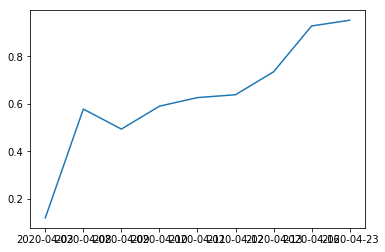

In [37]:

import vcr
import requests
import tasking_manager_client as tm
import matplotlib.pyplot as plt
import pandas as pd



with vcr.use_cassette('tests/fixtures/notebooks.yaml',mode='new_episodes'):
    
    for pid in [31,32,33]:
        j = tm.v2.projects_id_contributions_queries_day(id=pid, instance='tasking-manager-tm4-api.hotosm.org')
        contribs = pd.json_normalize(j['stats'])
        print(contribs)
        plt.plot(contribs.date, contribs.cumulative_mapped / contribs.total_tasks)
plt.show()